In [1]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.pipelines import price_model
from scripts.predict import future_price_prediction
from scripts.lstm import FeatureSelfAttnLSTM
from scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
scaler = StandardScaler()
model_type = FeatureSelfAttnLSTM
criterion = CustomizedLoss()

In [4]:
# 📂 Load dataset
file_path_1 = "../ready_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1)

Overall Average Training Loss: 0.0112
Final Evaluation Loss on Test Set: 0.0026
RMSE: 18.8817, MAE: 12.4645, R²: 0.9154, Directional Accuracy: 0.5024


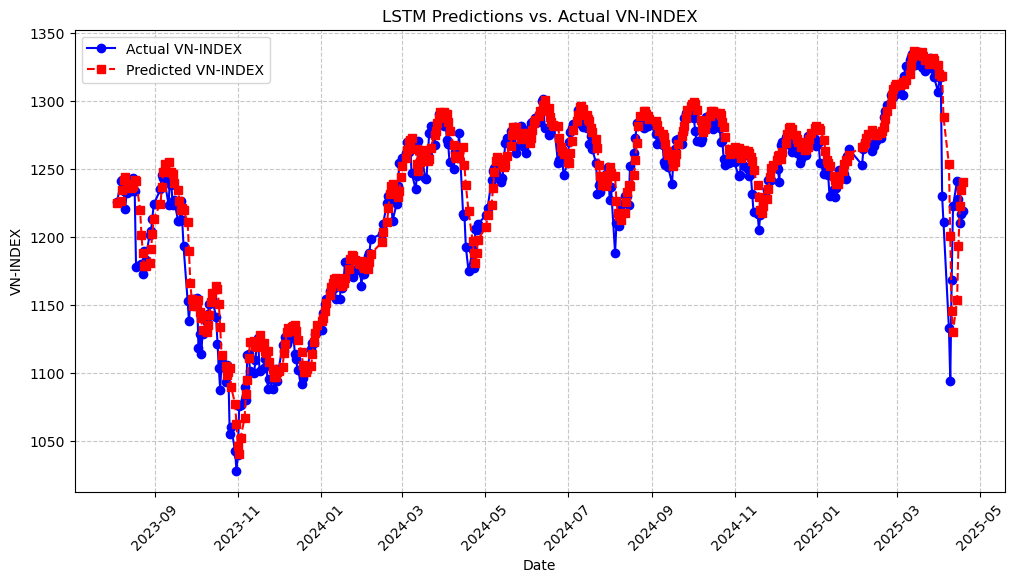

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-04      1225.980003         1224.736988
1   2023-08-07      1241.420009         1226.468804
2   2023-08-08      1242.230007         1234.480588
3   2023-08-09      1233.990009         1242.007818
4   2023-08-10      1220.609985         1244.119409
..         ...              ...                 ...
420 2025-04-14      1241.440007         1153.697740
421 2025-04-15      1227.789995         1193.163626
422 2025-04-16      1210.299989         1222.583116
423 2025-04-17      1217.250007         1234.906056
424 2025-04-18      1219.119992         1240.177901

[425 rows x 3 columns]


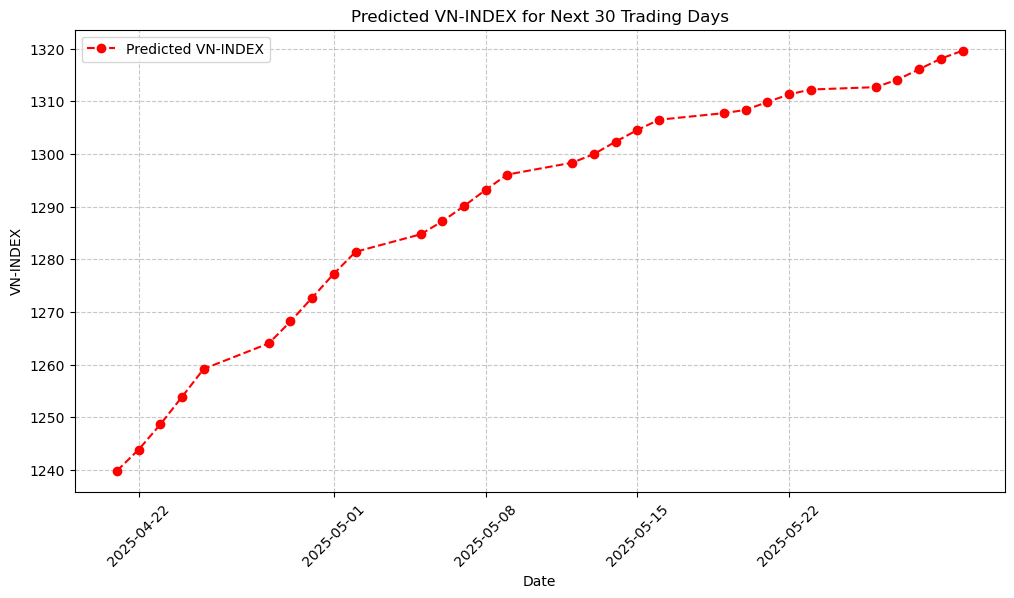

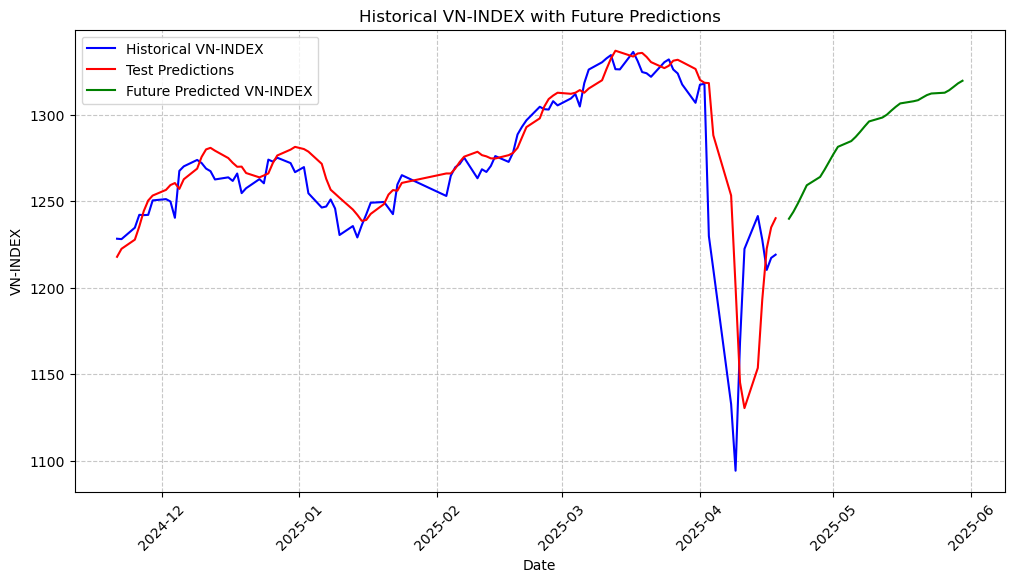

         Date  Predicted VN-INDEX
0  2025-04-21         1239.874560
1  2025-04-22         1243.900015
2  2025-04-23         1248.682696
3  2025-04-24         1253.909682
4  2025-04-25         1259.212630
5  2025-04-28         1264.042965
6  2025-04-29         1268.205318
7  2025-04-30         1272.720771
8  2025-05-01         1277.257164
9  2025-05-02         1281.425651
10 2025-05-05         1284.746722
11 2025-05-06         1287.197475
12 2025-05-07         1290.093803
13 2025-05-08         1293.178639
14 2025-05-09         1296.086291
15 2025-05-12         1298.349443
16 2025-05-13         1299.982432
17 2025-05-14         1302.342016
18 2025-05-15         1304.544884
19 2025-05-16         1306.495949
20 2025-05-19         1307.753590
21 2025-05-20         1308.363030
22 2025-05-21         1309.861805
23 2025-05-22         1311.311367
24 2025-05-23         1312.231842
25 2025-05-26         1312.684567
26 2025-05-27         1314.109811
27 2025-05-28         1316.076918
28 2025-05-29 

In [6]:
# 📊 Select only VN-INDEX for prediction
data = df_1[["VN_Index_Close", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']]

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1[["VN_Index_Close", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']], ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
# 📂 Load dataset
file_path_2 = "../ready_data/vn_index_external_data.csv"
df_2 = pd.read_csv(file_path_2)
df_2 = quicky_data(df_2)

In [ ]:
data = df_2

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
data = lag_features_indicators(df_2, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
data = lag_features_indicators(df_2, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
# 📂 Load dataset
file_path_3 = "../ready_data/vn_index_merged_data.csv"
df_3 = pd.read_csv(file_path_3)
df_3 = quicky_data(df_3)

In [ ]:
data = df_3

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
data = lag_features_indicators(df_3, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
data = lag_features_indicators(df_3, df_3.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
data = lag_features_indicators(df_3, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)

In [ ]:
data = lag_features_indicators(df_3, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30)